In [1]:
from chesslab_.agent_torch import agent
from chesslab_.agent_mcts import agent_MCTS
from chesslab_.agent_stockfish import agent_stockfish as s_agent
from chesslab_.tests import kaufman_test
from chesslab_.utils import join_and_sort
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import torch.nn as nn
class Model_0(nn.Module):

    def __init__(self):
        super().__init__()
        #self.func_1=nn.ReLU()
        #self.func_2=nn.ReLU()
        #self.func_3=nn.ReLU()
        #self.func_4=nn.ReLU()
        
        self.func_1=nn.ELU()
        self.func_2=nn.ELU()
        self.func_3=nn.ELU()
        self.func_4=nn.ELU()
        
        #self.d1 = nn.Dropout(0.5)
        #self.d2 = nn.Dropout(0.5)
        #self.d3 = nn.Dropout(0.5)
        #self.d4 = nn.Dropout(0.5)
        
        #self.b1= nn.BatchNorm2d(32)
        #self.b2= nn.BatchNorm2d(64)
        #self.b3= nn.BatchNorm2d(128)
        #self.b4 = nn.BatchNorm1d(256)
        
        self.cnn_1 = nn.Conv2d(3, 32, kernel_size=7,padding=3)
        self.cnn_2 = nn.Conv2d(32, 64, kernel_size=5,padding=2)
        self.cnn_3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)

        self.linear_1 = nn.Linear(8*8*128,256 )
        self.linear_2 = nn.Linear(256, 2)

    def forward(self, x ):
        out = self.cnn_1(x)
        #out = self.b1(out)
        out = self.func_1(out)
        #out = self.d1(out)
        out = self.cnn_2(out)
        #out = self.b2(out)
        out = self.func_2(out)
        #out = self.d2(out)
        out = self.cnn_3(out)
        #out = self.b3(out)
        out = self.func_3(out)
        #out = self.d3(out)
        out = out.reshape([x.size(0), -1])
        out = self.linear_1(out)
        #out = self.b4(out)
        out = self.func_4(out)
        #out = self.d4(out)
        out = self.linear_2(out)

        return out
model = Model_0()

In [3]:
a = 2
a = a+1 if False else a-1
a

1

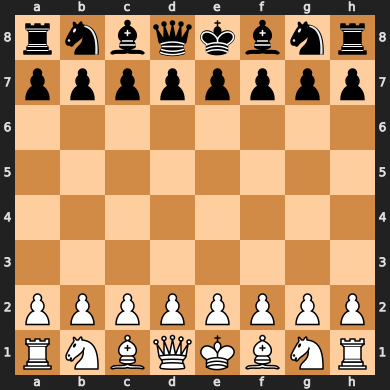

In [4]:
board=chess.Board()
board

In [5]:
base_name = './tmp/test_noeaten.0.'
deepbot = agent(base_name+'3.pt',model)
move=deepbot.select_move(board)
move

Move.from_uci('d2d4')

In [6]:
moves,values=deepbot.get_move_values(board,both_players=True)

In [7]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [8]:
np.round(values.tolist())

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [9]:
deepMCTS = agent_MCTS(temperature=2,bot=deepbot,game_state=board,max_iter=100)

In [10]:
moves,values=deepMCTS.get_move_values(board)

MCTS - Elapsed time: 1.35s = 0.02m


In [11]:
moves

[Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('b2b3'),
 Move.from_uci('d2d3'),
 Move.from_uci('b1c3'),
 Move.from_uci('g2g3'),
 Move.from_uci('a2a4'),
 Move.from_uci('g1f3'),
 Move.from_uci('f2f4'),
 Move.from_uci('b1a3'),
 Move.from_uci('b2b4'),
 Move.from_uci('f2f3'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('e2e3'),
 Move.from_uci('g1h3'),
 Move.from_uci('e2e4'),
 Move.from_uci('h2h3'),
 Move.from_uci('c2c3'),
 Move.from_uci('a2a3')]

In [12]:
values

array([0.5       , 0.83333333, 0.6       , 0.83333333, 0.6       ,
       0.5       , 0.66666667, 0.5       , 0.83333333, 0.66666667,
       0.25      , 0.8       , 0.85714286, 0.8       , 0.5       ,
       0.8       , 0.8       , 0.5       , 0.8       , 0.25      ])

In [13]:
join_and_sort(moves,values)

array([[Move.from_uci('d2d4'), 0.8571428571428571],
       [Move.from_uci('g2g4'), 0.8333333333333334],
       [Move.from_uci('d2d3'), 0.8333333333333334],
       [Move.from_uci('f2f4'), 0.8333333333333334],
       [Move.from_uci('e2e4'), 0.8],
       [Move.from_uci('c2c3'), 0.8],
       [Move.from_uci('g1h3'), 0.8],
       [Move.from_uci('f2f3'), 0.8],
       [Move.from_uci('c2c4'), 0.8],
       [Move.from_uci('b1a3'), 0.6666666666666666],
       [Move.from_uci('a2a4'), 0.6666666666666666],
       [Move.from_uci('b2b3'), 0.6],
       [Move.from_uci('b1c3'), 0.6],
       [Move.from_uci('h2h3'), 0.5],
       [Move.from_uci('h2h4'), 0.5],
       [Move.from_uci('g1f3'), 0.5],
       [Move.from_uci('g2g3'), 0.5],
       [Move.from_uci('e2e3'), 0.5],
       [Move.from_uci('b2b4'), 0.25],
       [Move.from_uci('a2a3'), 0.25]], dtype=object)

MCTS - Elapsed time: 1.37s = 0.02m


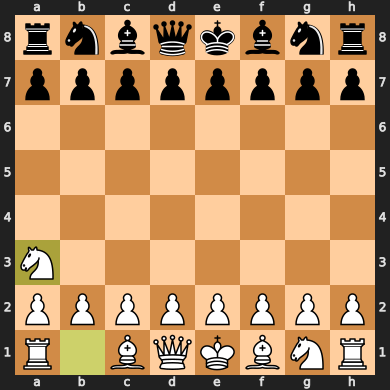

In [14]:
move=deepMCTS.select_move(board)
board.push(move)
board

In [15]:
acc = kaufman_test(deepbot)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 7/25 = 0.28


In [16]:
acc,boards,data = kaufman_test(deepbot,details=2)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 7/25 = 0.28
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 6 & 48 & 0.8936 & 0.6028 & c1c7 & 0.8570  \\
02 & f5d4 & 21 & 39 & 0.4737 & 0.6340 & a5d2 & 0.8480  \\
03 & e1d1 & 21 & 38 & 0.4595 & 0.5060 & f2c5 & 0.9166  \\
04 & b1b2 & 1 & 47 & 1.0000 & 0.7354 & b1b2 & 0.7354  \\
05 & g5c1 & 2 & 48 & 0.9787 & 0.9494 & c8c3 & 0.9652  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.5175 & a3a2 & 0.5175  \\
07 & b7e4 & 28 & 33 & 0.1562 & 0.4157 & c8e8 & 0.5566  \\
08 & h7h6 & 11 & 39 & 0.7368 & 0.3948 & e1c1 & 0.8030  \\
09 & f3e2 & 8 & 35 & 0.7941 & 0.5897 & d2h6 & 0.7519  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.7615 & c7a5 & 0.7646  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.8507 & g3f5 & 0.8507  \\
12 & c6d6 & 14 & 41 & 0.6750 & 0.0049 & e7e4 & 0.0164  \\
13 & c3d5 & 8 & 30 & 0.7586 & 0.9945 & f1f6 & 0.9999  \\
14 & b1b2 & 39 & 49 & 0.2083 & 0.3167 & d3g6 & 0.9083  \\
15 & d3f5 & 6 & 51 & 0.9000 & 0.663

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.602791,c1c7,0.857030,6,48,0.893617
1,f5d4,0.634004,a5d2,0.848028,21,39,0.473684
2,e1d1,0.505972,f2c5,0.916630,21,38,0.459459
3,b1b2,0.735360,b1b2,0.735360,1,47,1.000000
4,g5c1,0.949427,c8c3,0.965190,2,48,0.978723
5,a3a2,0.517546,a3a2,0.517546,1,31,1.000000
6,b7e4,0.415699,c8e8,0.556603,28,33,0.156250
7,h7h6,0.394792,e1c1,0.802965,11,39,0.736842
8,f3e2,0.589749,d2h6,0.751859,8,35,0.794118
9,d5c3,0.761462,c7a5,0.764555,2,41,0.975000


In [17]:
acc = kaufman_test(deepMCTS)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))

Kaufman test 
1
MCTS - Elapsed time: 1.79s = 0.03m
2
MCTS - Elapsed time: 1.75s = 0.03m
3
MCTS - Elapsed time: 1.64s = 0.03m
4
MCTS - Elapsed time: 2.11s = 0.04m
5
MCTS - Elapsed time: 1.81s = 0.03m
6
MCTS - Elapsed time: 1.48s = 0.02m
7
MCTS - Elapsed time: 1.72s = 0.03m
8
MCTS - Elapsed time: 1.52s = 0.03m
9
MCTS - Elapsed time: 1.66s = 0.03m
10
MCTS - Elapsed time: 1.71s = 0.03m
11
MCTS - Elapsed time: 1.45s = 0.02m
12
MCTS - Elapsed time: 1.66s = 0.03m
13
MCTS - Elapsed time: 1.34s = 0.02m
14
MCTS - Elapsed time: 2.16s = 0.04m
15
MCTS - Elapsed time: 1.78s = 0.03m
16
MCTS - Elapsed time: 0.43s = 0.01m
17
MCTS - Elapsed time: 1.67s = 0.03m
18
MCTS - Elapsed time: 1.83s = 0.03m
19
MCTS - Elapsed time: 1.82s = 0.03m
20
MCTS - Elapsed time: 0.70s = 0.01m
21
MCTS - Elapsed time: 0.84s = 0.01m
22
MCTS - Elapsed time: 0.73s = 0.01m
23
MCTS - Elapsed time: 1.77s = 0.03m
24
MCTS - Elapsed time: 0.94s = 0.02m
25
MCTS - Elapsed time: 0.73s = 0.01m
Accuracy: 1/25 = 0.04


In [18]:
acc,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
MCTS - Elapsed time: 1.77s = 0.03m
2
MCTS - Elapsed time: 1.94s = 0.03m
3
MCTS - Elapsed time: 1.67s = 0.03m
4
MCTS - Elapsed time: 2.12s = 0.04m
5
MCTS - Elapsed time: 1.81s = 0.03m
6
MCTS - Elapsed time: 1.39s = 0.02m
7
MCTS - Elapsed time: 1.72s = 0.03m
8
MCTS - Elapsed time: 1.36s = 0.02m
9
MCTS - Elapsed time: 1.51s = 0.03m
10
MCTS - Elapsed time: 1.62s = 0.03m
11
MCTS - Elapsed time: 1.38s = 0.02m
12
MCTS - Elapsed time: 1.54s = 0.03m
13
MCTS - Elapsed time: 1.29s = 0.02m
14
MCTS - Elapsed time: 2.05s = 0.03m
15
MCTS - Elapsed time: 1.73s = 0.03m
16
MCTS - Elapsed time: 0.42s = 0.01m
17
MCTS - Elapsed time: 1.66s = 0.03m
18
MCTS - Elapsed time: 1.47s = 0.02m
19
MCTS - Elapsed time: 1.45s = 0.02m
20
MCTS - Elapsed time: 0.54s = 0.01m
21
MCTS - Elapsed time: 0.59s = 0.01m
22
MCTS - Elapsed time: 0.56s = 0.01m
23
MCTS - Elapsed time: 1.53s = 0.03m
24
MCTS - Elapsed time: 0.89s = 0.01m
25
MCTS - Elapsed time: 0.64s = 0.01m
Accuracy: 0/25 = 0.0
id & Mejor & Pos. & Tota

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,1.000000,b4e1,1.000000,4,48,0.936170
1,f5d4,0.000000,d7d4,1.000000,38,39,0.026316
2,e1d1,0.000000,f2g3,1.000000,36,38,0.054054
3,b1b2,0.500000,b1d1,1.000000,32,47,0.326087
4,g5c1,1.000000,g5g3,1.000000,2,48,0.978723
5,a3a2,0.333333,a3e3,0.800000,12,31,0.633333
6,b7e4,0.333333,c7c6,0.800000,23,33,0.312500
7,h7h6,0.000000,f8f1,1.000000,39,39,0.000000
8,f3e2,0.666667,d2a5,1.000000,8,35,0.794118
9,d5c3,1.000000,c7a5,1.000000,5,41,0.900000


In [19]:
deepMCTS.set_max_iter(1000)
acc,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
MCTS - Elapsed time: 19.71s = 0.33m
2
MCTS - Elapsed time: 17.42s = 0.29m
3
MCTS - Elapsed time: 15.93s = 0.27m
4
MCTS - Elapsed time: 19.22s = 0.32m
5
MCTS - Elapsed time: 17.80s = 0.30m
6
MCTS - Elapsed time: 13.11s = 0.22m
7
MCTS - Elapsed time: 16.06s = 0.27m
8
MCTS - Elapsed time: 15.90s = 0.26m
9
MCTS - Elapsed time: 15.62s = 0.26m
10
MCTS - Elapsed time: 18.06s = 0.30m
11
MCTS - Elapsed time: 15.73s = 0.26m
12
MCTS - Elapsed time: 15.98s = 0.27m
13
MCTS - Elapsed time: 13.83s = 0.23m
14
MCTS - Elapsed time: 21.38s = 0.36m
15
MCTS - Elapsed time: 21.16s = 0.35m
16
MCTS - Elapsed time: 4.76s = 0.08m
17
MCTS - Elapsed time: 19.74s = 0.33m
18
MCTS - Elapsed time: 14.69s = 0.24m
19
MCTS - Elapsed time: 17.17s = 0.29m
20
MCTS - Elapsed time: 6.83s = 0.11m
21
MCTS - Elapsed time: 8.25s = 0.14m
22
MCTS - Elapsed time: 6.14s = 0.10m
23
MCTS - Elapsed time: 15.41s = 0.26m
24
MCTS - Elapsed time: 8.69s = 0.14m
25
MCTS - Elapsed time: 5.92s = 0.10m
Accuracy: 6/25 = 0.24
id &

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.571429,f2f4,0.823529,22,48,0.553191
1,f5d4,0.727273,a5d2,0.794872,4,39,0.921053
2,e1d1,0.315789,f2c5,0.928571,32,38,0.162162
3,b1b2,0.703704,e2g1,0.800000,7,47,0.869565
4,g5c1,0.866667,c8c3,0.914286,2,48,0.978723
5,a3a2,0.469697,a3a2,0.469697,1,31,1.000000
6,b7e4,0.500000,c7b8,0.619048,10,33,0.718750
7,h7h6,0.176471,e1c1,0.815385,37,39,0.052632
8,f3e2,0.605263,d2a5,0.740000,5,35,0.882353
9,d5c3,0.767442,d5c3,0.767442,1,41,1.000000


In [ ]:
deepMCTS.set_max_iter(10000)
acc,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
MCTS - Elapsed time: 151.40s = 2.52m
2
MCTS - Elapsed time: 153.98s = 2.57m
3
MCTS - Elapsed time: 160.39s = 2.67m
4
MCTS - Elapsed time: 196.56s = 3.28m
5
MCTS - Elapsed time: 152.54s = 2.54m
6
MCTS - Elapsed time: 142.61s = 2.38m
7
MCTS - Elapsed time: 167.24s = 2.79m
8
MCTS - Elapsed time: 128.53s = 2.14m
9
MCTS - Elapsed time: 157.24s = 2.62m
10
MCTS - Elapsed time: 160.94s = 2.68m
11


In [ ]:
stop

In [ ]:
import chess.svg
from IPython.display import display
#deepbot = chess_torch_agent('./tmp/model_v1.0.2.h5')
acc,boards,best_moves,move_details,data = kaufman_test(deepbot,details=2)
print('Accuracy: {}'.format(acc))
for i in range(1):
    print('='*50)
    display(chess.svg.board(boards[i],size=350))
    print('best move / move predicted: {} / {}'.format(best_moves[i],move_details[i][0][0]))
    for j,(m,v) in enumerate(move_details[i]):
        print('{:02d} - move: {}: {:.4f}'.format(j+1,m,v))

In [ ]:
import chess.svg
from IPython.display import display
deepbot = agent('{}{}.pt'.format(base_name,1),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

In [ ]:
deepbot = agent('{}{}.pt'.format(base_name,2),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

In [ ]:
deepbot = agent('{}{}.pt'.format(base_name,3),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

In [ ]:
deepbot = agent('{}{}.pt'.format(base_name,30),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

In [ ]:
exact_acc = np.zeros(30)
for i in range(1,30+1):
    deepbot = agent('{}{}.pt'.format(base_name,i),model)
    acc  = kaufman_test(deepbot,details=0)
    exact_acc[i-1]=acc
    print('Epoca: {}, accuracy: {}'.format(i,acc))

train_acc_model = np.array(deepbot.history['train']['acc'])
test_acc_model = np.array(deepbot.history['test']['acc'])


In [ ]:
valuable_acc = np.zeros(30)
for i in range(1,30+1):
    deepbot = agent('{}{}.pt'.format(base_name,i),model)
    acc  = kaufman_test(deepbot,details=3)
    valuable_acc[i-1]=acc
    print('Epoca: {}, accuracy: {}'.format(i,acc))

In [ ]:
path = 'E:/database/stockfish_14.exe'
deepbot = s_agent(path)
ss = kaufman_test(deepbot)
print("Exactitud para función de stockfish usando prueba de kaufman {}".format(ss))
ssp  = kaufman_test(deepbot,details=3)
print("Exactitud para función de stockfish usando prueba de kaufman ponderada {}".format(ssp))
ss = np.repeat(ss,30)
ssp = np.repeat(ssp,30)

In [ ]:
x = np.arange(30)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,valuable_acc*100)
plt.plot(x,ss*100,linestyle='dashed')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Accuracy per training epoch')
plt.xlabel('Training epoch')
plt.ylabel('Accuracy')
plt.legend(['Training set NN','Test set NN','Kaufman test (NN)','Kaufman Test weighted (NN)','Kaufman test (S)','Kaufman test weighted(S)'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [ ]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(30):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*valuable_acc[i]))